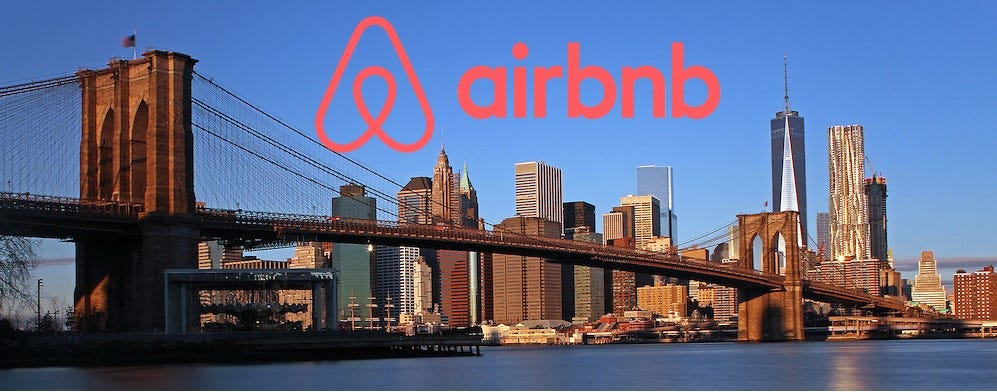

In [2]:
from IPython.display import Image
Image(filename='/air.jpg')

# Project Overview
Airbnb is a paid community platform for renting and booking private accommodation founded in 2008. Airbnb allows individuals to rent all or part of their own home as extra accommodation. The site offers a search and booking platform between the person offering their accommodation and the vacationer who wishes to rent it. It covers more than 1.5 million advertisements in more than 34,000 cities and 191 countries. From creation, inaugust 2008, until June 2012, more than 10 million nights have been booked on Airbnb.


Target : Determine the most profitable areas in New York

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Exploratory Data Analysis (EDA)

**Initial Data Understanding**


*   Data loading and Inspection
*   Data Types

*   Missing Values
*  Duplicates


In [4]:
df = pd.read_csv('/AirBnB New York dataset.csv')

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,1/5/2023,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,3/12/2023,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [8]:
df.shape

(20770, 22)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [10]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,7
latitude,7
longitude,7
room_type,7
price,34


In [11]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        #print("--------------------------------------------------------")
        print(f"{column} : {df[column].isnull().sum()}")

neighbourhood : 7
latitude : 7
longitude : 7
room_type : 7
price : 34
minimum_nights : 7
number_of_reviews : 7
last_review : 7
reviews_per_month : 7
calculated_host_listings_count : 7
availability_365 : 7
number_of_reviews_ltm : 7


In [12]:
df.duplicated().sum()

np.int64(12)

2. Basic Statistical Overview


*   Summary Statistical : Describe()





In [13]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20770.0,3.033858e+17,3.901221e+17,2595.000000,2.707260e+07,4.992852e+07,7.220000e+17,1.050000e+18
host_id,20770.0,1.749049e+08,1.725657e+08,1678.000000,2.041184e+07,1.086990e+08,3.143997e+08,5.504035e+08
latitude,20763.0,4.072682e+01,6.029301e-02,40.500314,4.068416e+01,4.072289e+01,4.076311e+01,4.091115e+01
longitude,20763.0,-7.393918e+01,6.140254e-02,-74.249840,-7.398076e+01,-7.394960e+01,-7.391747e+01,-7.371365e+01
price,20736.0,1.877149e+02,1.023245e+03,10.000000,8.000000e+01,1.250000e+02,1.990000e+02,1.000000e+05
minimum_nights,20763.0,2.855849e+01,3.353270e+01,1.000000,3.000000e+01,3.000000e+01,3.000000e+01,1.250000e+03
number_of_reviews,20763.0,4.261061e+01,7.352340e+01,1.000000,4.000000e+00,1.400000e+01,4.900000e+01,1.865000e+03
reviews_per_month,20763.0,1.257589e+00,1.904472e+00,0.010000,2.100000e-01,6.500000e-01,1.800000e+00,7.549000e+01
calculated_host_listings_count,20763.0,1.886669e+01,7.092144e+01,1.000000,1.000000e+00,2.000000e+00,5.000000e+00,7.130000e+02
availability_365,20763.0,2.060680e+02,1.350773e+02,0.000000,8.700000e+01,2.150000e+02,3.530000e+02,3.650000e+02


In [15]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
name,20770,9836,Rental unit in New York · 1 bedroom · 1 bed · ...,409
host_name,20770,5815,Jeniffer,187
neighbourhood_group,20770,5,Manhattan,8050
neighbourhood,20763,221,Bedford-Stuyvesant,1583
room_type,20763,4,Entire home/apt,11555
last_review,20763,1878,4/9/2023,326
license,20770,879,No License,17579
rating,20770,162,No rating,3595
bedrooms,20770,12,1,13445
baths,20770,17,1,17026


In [16]:
df.select_dtypes(include='object').describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,license,rating,bedrooms,baths
count,20770,20770,20770,20763,20763,20763,20770,20770,20770,20770
unique,9836,5815,5,221,4,1878,879,162,12,17
top,Rental unit in New York · 1 bedroom · 1 bed · ...,Jeniffer,Manhattan,Bedford-Stuyvesant,Entire home/apt,4/9/2023,No License,No rating,1,1
freq,409,187,8050,1583,11555,326,17579,3595,13445,17026


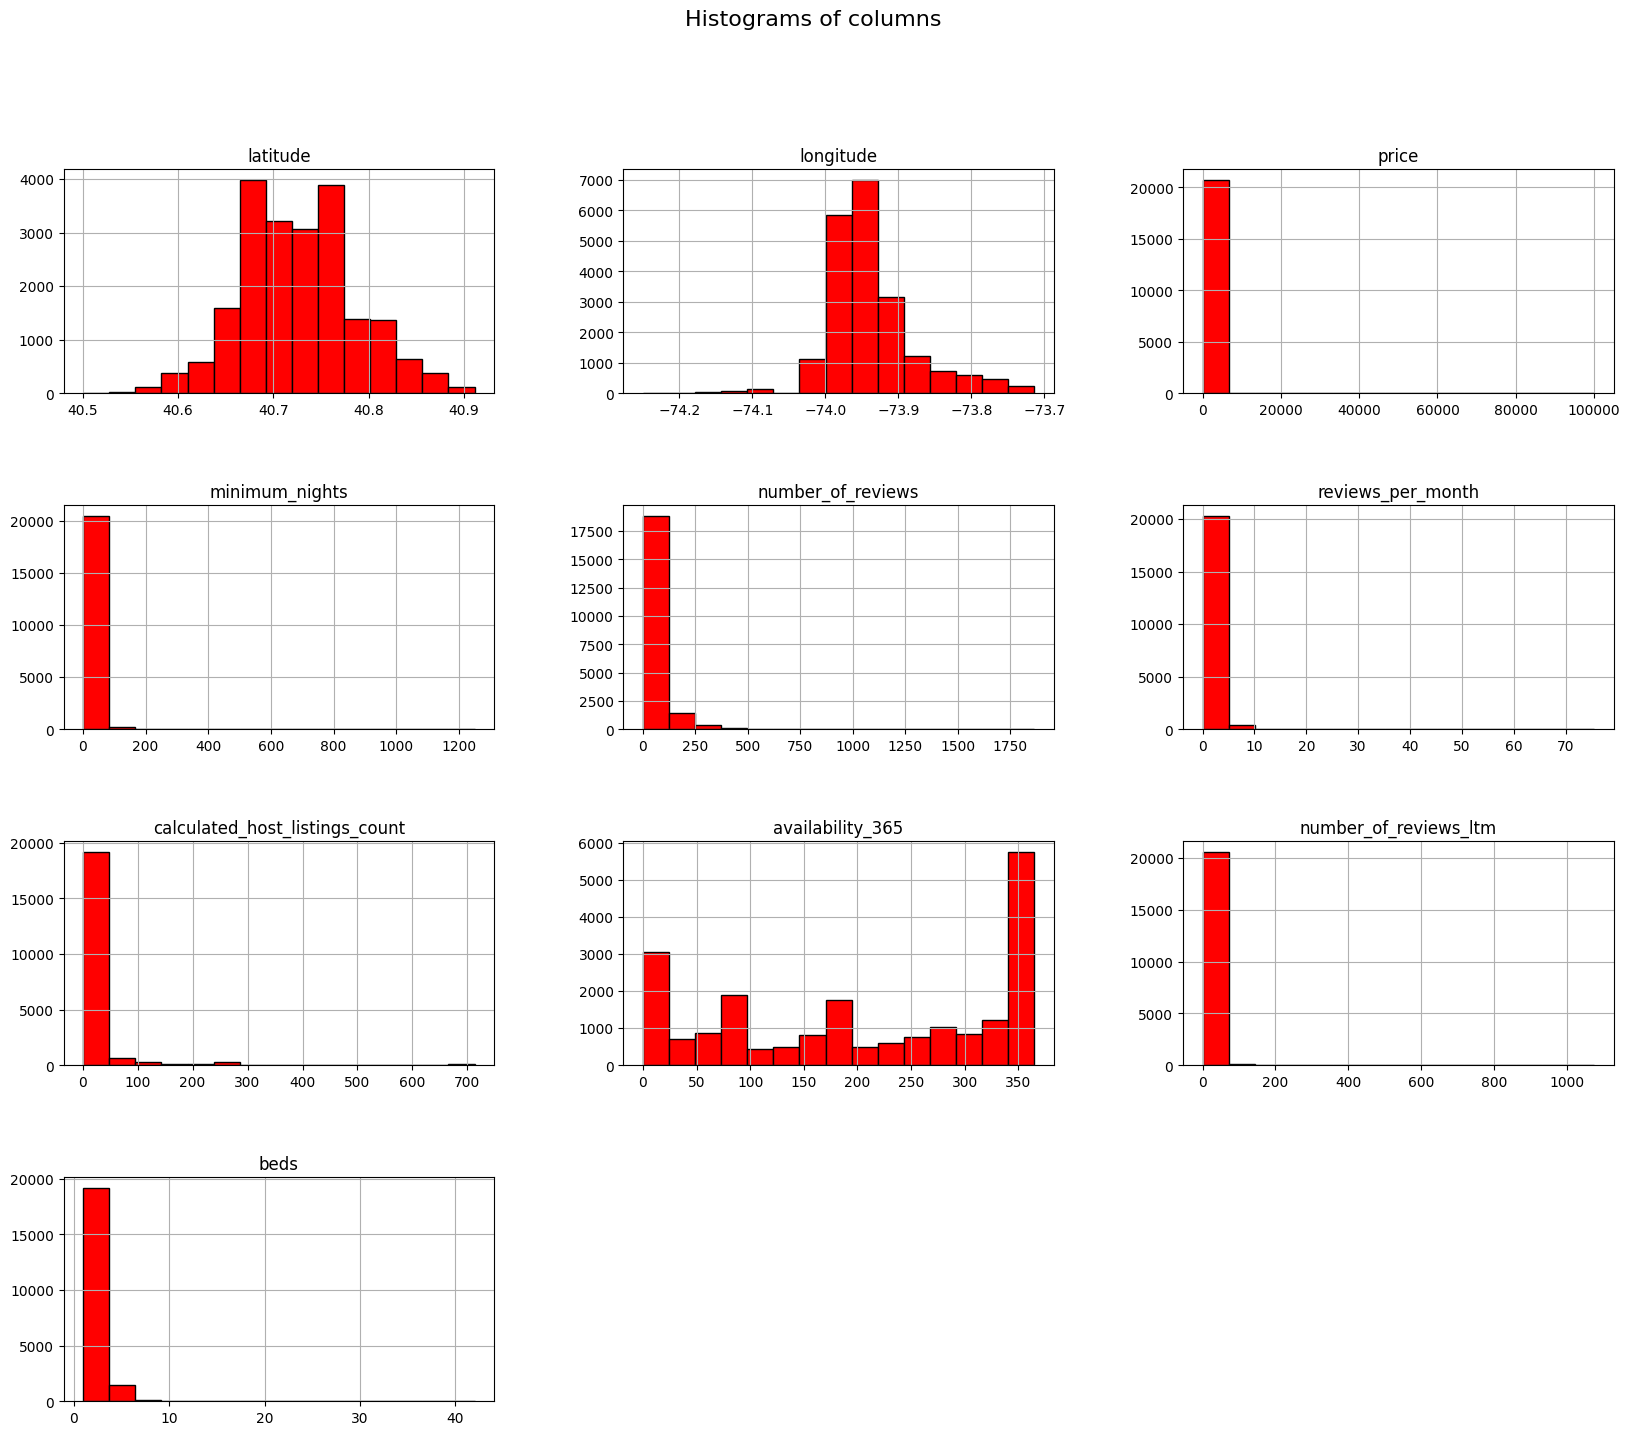

In [17]:
df.drop(['id','name','host_id','host_name','last_review'],axis=1).hist(bins=15, figsize=(20,16),color='red',edgecolor = 'black')
plt.suptitle('Histograms of columns', fontsize=16)
plt.subplots_adjust(hspace=0.5)
plt.show()



*  Summary Statistical : Value_counts()




In [18]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [19]:
df['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
Manhattan,8050
Brooklyn,7719
Queens,3761
Bronx,949
Staten Island,291


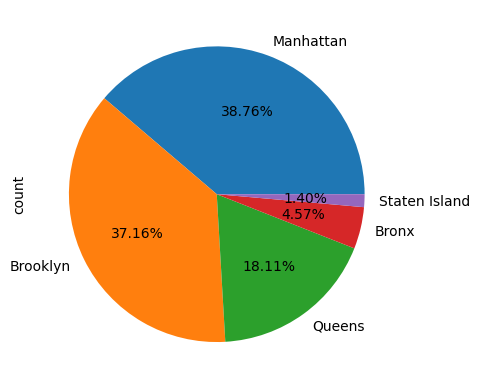

In [20]:
df['neighbourhood_group'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

In [21]:
df['room_type'].value_counts()

,count
room_type,
Entire home/apt,11555
Private room,8803
Shared room,293
Hotel room,112


/tmp/ipython-input-1342411179.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type',data=df, palette=['red','blue','orange','green'])


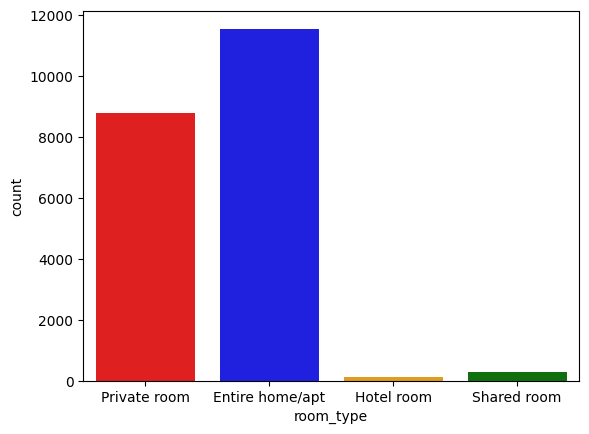

In [22]:
sns.countplot(x='room_type',data=df, palette=['red','blue','orange','green'])
plt.show()

In [23]:
df['bedrooms'].value_counts()

,count
bedrooms,
1,13445
2,3606
Studio,1817
3,1394
4,345
5,112
6,29
7,9
9,6


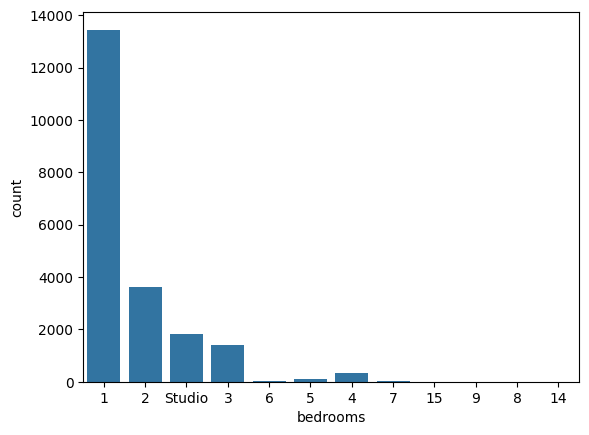

In [24]:
sns.countplot(x='bedrooms',data=df)
plt.show()

In [25]:
df['license'].value_counts()

,count
license,
No License,17579
Exempt,2137
OSE-STRREG-0000068,14
OSE-STRREG-0000437,6
OSE-STRREG-0008664,6
...,...
OSE-STRREG-0000999,1
OSE-STRREG-0000199,1
OSE-STRREG-0000447,1


In [26]:
df['rating'].value_counts()

,count
rating,
No rating,3595
5,2883
4.67,518
4.75,469
4.8,439
...,...
3.58,1
3.77,1
3.65,1


In [27]:
df['beds'].value_counts()

,count
beds,
1,12316
2,4840
3,2029
4,929
5,335
6,162
7,63
8,49
9,22


In [28]:
df['baths'].value_counts()

,count
baths,
1,17026
2,2083
1.5,1001
2.5,240
3,171
0,82
4,69
3.5,50
4.5,18


In [30]:
def Round(i):
    if i != 'Not specified':
        i = float(i)
        i = round(i)
        return i
    else :
        return 'Not specified'

df['baths'] = df['baths'].apply(lambda x: Round(x))

In [31]:
df['baths'].value_counts()

,count
baths,
1,17026
2,3324
3,171
4,137
0,82
Not specified,13
6,8
5,6
12,1


**Distribution of Variables**


*   Numerical Feature (KDE)




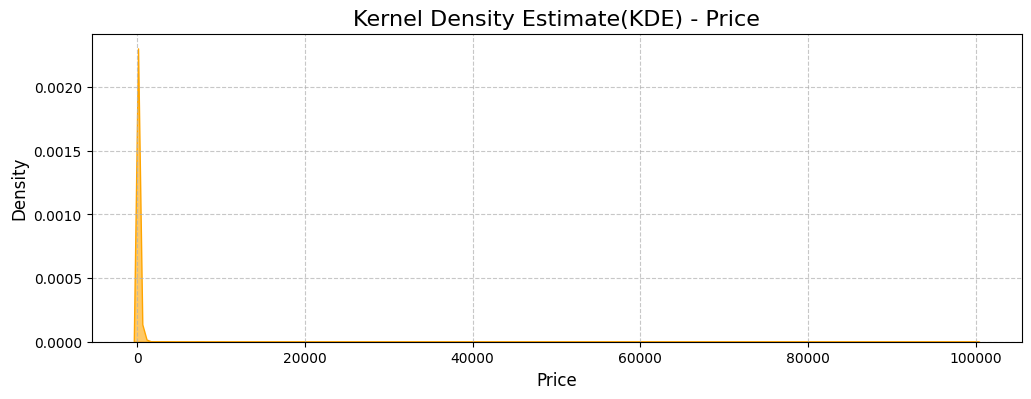

In [32]:
plt.figure(figsize=(12,4))
sns.kdeplot(df['price'],fill = True, color = 'orange', alpha = 0.6)
plt.title('Kernel Density Estimate(KDE) - Price', fontsize = 16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Density', fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

**The KDE plot reinforces the understanding that the "Price" data is highly right-skewed, with most prices being very low and only a few instances of extremely high prices (outliers).**

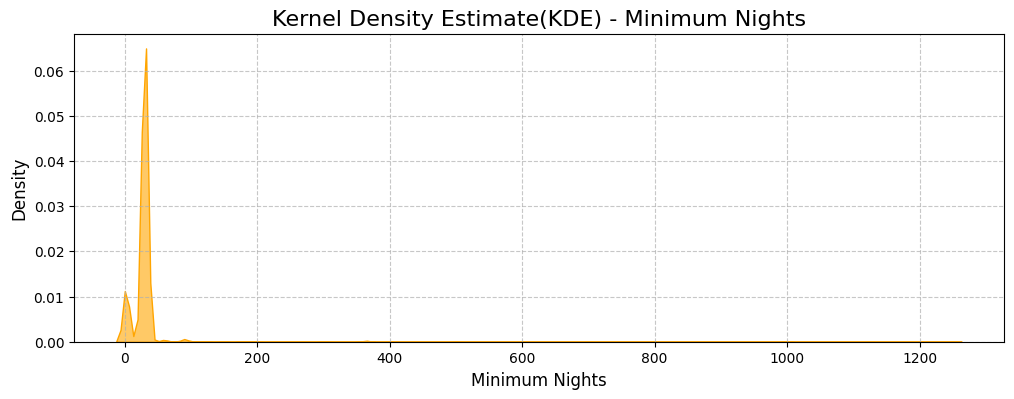

In [33]:
plt.figure(figsize=(12,4))
sns.kdeplot(df['minimum_nights'],fill = True, color = 'orange', alpha = 0.6)
plt.title('Kernel Density Estimate(KDE) - Minimum Nights', fontsize = 16)
plt.xlabel('Minimum Nights', fontsize=12)
plt.ylabel('Density', fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()



*   **Extreme Concentration at Low Values**: The plot shows a very prominent,
tall, and narrow peak at the very beginning of the X-axis, specifically around 1 to a few nights. This indicates that the overwhelming majority of listings or bookings require a very short minimum stay, most likely 1, 2, or 3 nights.
*   **Highly Skewed Distribution**: The distribution is heavily right-skewed. After the initial sharp peak, the density quickly drops close to zero and remains very low across the rest of the X-axis, extending all the way to 1250. This signifies that while most minimum nights are low, there are a few instances where a very high number of minimum nights is required. These could be considered outliers or specific types of long-term rentals


*   **Similar to "Price" Distribution**: This distribution pattern (a sharp peak at low values and a long, sparse tail) is very similar to what was observed in the "Price" KDE plot, suggesting that both "Price" and "Minimum Nights" might have similar underlying distribution characteristics in this dataset, with a large concentration of values at the lower end and rare, high outliers.








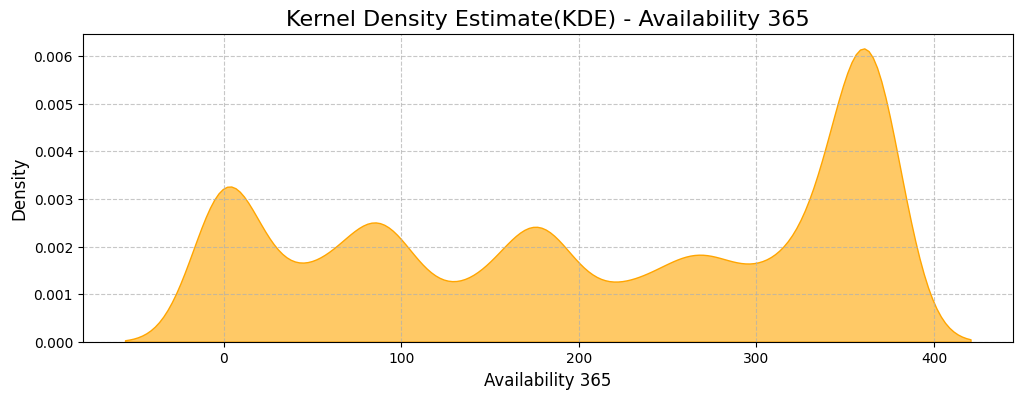

In [34]:
plt.figure(figsize=(12,4))
sns.kdeplot(df['availability_365'],fill = True, color = 'orange', alpha = 0.6)
plt.title('Kernel Density Estimate(KDE) - Availability 365', fontsize = 16)
plt.xlabel('Availability 365', fontsize=12)
plt.ylabel('Density', fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()



*   **Peak around 0**: There's a notable peak very close to 0 on the x-axis (around a density of 0.003). This suggests a significant number of listings are available for very few days, possibly indicating short-term or highly booked properties.
*   **Multiple Peaks (Multimodal Distribution)**: The plot exhibits several distinct peaks, indicating multiple modes (or clusters) in the data:


1.   A peak near 0.
2.  Another peak around 80-100 days.
3.  A peak around 180-200 days.
4.  A peak around 280-300 days.


*   A very prominent peak towards the higher end, specifically around 350-365 days (close to the maximum possible availability). This is the highest peak, suggesting that a large proportion of listings are available for almost the entire year.

*  I**mplies Different Listing Strategies**: The multimodal nature suggests that there isn't just one typical availability pattern. Instead, there might be different categories of listings:


*   Those with very limited availability (e.g., owner-occupied for most of the year, or popular rentals booked solid).
*   Those with moderate availability (perhaps seasonal rentals, or properties available for a few months a year)

*   Those with high availability (e.g., dedicated rental properties available almost all year round).










# **Data Cleaning**


In [35]:
df.duplicated().sum()

np.int64(12)

In [36]:
df = df.drop_duplicates()

In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
df = df.drop(['id','name','host_id', 'host_name'], axis=1)

In [39]:
df.isnull().sum()

,0
neighbourhood_group,0
neighbourhood,7
latitude,7
longitude,7
room_type,7
price,34
minimum_nights,7
number_of_reviews,7
last_review,7
reviews_per_month,7


In [40]:
df['rating'].value_counts()

,count
rating,
No rating,3593
5,2882
4.67,517
4.75,469
4.8,439
...,...
3.58,1
3.77,1
3.65,1


In [41]:
df[df['rating']=='No rating']

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
15,Queens,Astoria,40.760680,-73.909260,Private room,120.0,30.0,1.0,21/08/23,0.22,1.0,365.0,1.0,No License,No rating,1,2,1
17,Manhattan,Financial District,40.709994,-74.005000,Entire home/apt,100.0,30.0,1.0,30/08/23,0.23,1.0,38.0,1.0,No License,No rating,1,1,1
18,Queens,Sunnyside,40.743470,-73.913960,Private room,70.0,30.0,1.0,3/11/2019,0.02,1.0,0.0,0.0,No License,No rating,1,1,1
20,Manhattan,Midtown,40.761760,-73.976590,Hotel room,1000.0,30.0,1.0,2/7/2019,0.02,10.0,363.0,0.0,Exempt,No rating,Studio,2,1
21,Queens,East Elmhurst,40.765290,-73.863610,Private room,45.0,30.0,1.0,7/10/2018,0.02,1.0,0.0,0.0,No License,No rating,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20756,Manhattan,Upper East Side,40.771437,-73.955661,Entire home/apt,200.0,30.0,1.0,29/11/23,0.77,13.0,156.0,1.0,No License,No rating,2,2,1
20758,Manhattan,Chelsea,40.746682,-73.990396,Private room,65.0,30.0,1.0,22/11/23,0.65,6.0,269.0,1.0,No License,No rating,1,2,2
20759,Manhattan,Harlem,40.802970,-73.958090,Private room,53.0,30.0,1.0,3/12/2023,0.86,9.0,361.0,1.0,No License,No rating,1,1,2
20763,Manhattan,West Village,40.731810,-74.008190,Entire home/apt,215.0,30.0,1.0,28/06/17,0.01,164.0,358.0,0.0,No License,No rating,1,1,1


In [42]:
df[df['rating']=='New ']

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
280,Queens,Woodhaven,40.686400,-73.865990,Entire home/apt,96.0,30.0,1.0,31/12/23,1.00,1.0,365.0,1.0,No License,New,2,2,1
381,Manhattan,Midtown,40.744429,-73.985797,Private room,196.0,1.0,1.0,11/12/2023,1.00,7.0,50.0,1.0,Exempt,New,1,1,1
511,Manhattan,Harlem,40.812870,-73.945370,Entire home/apt,257.0,1.0,2.0,1/1/2024,2.00,10.0,270.0,2.0,Exempt,New,1,2,1
580,Manhattan,Midtown,40.756165,-73.980354,Private room,115.0,2.0,2.0,17/12/23,2.00,36.0,53.0,2.0,Exempt,New,1,1,1
659,Bronx,Wakefield,40.899759,-73.839512,Entire home/apt,198.0,2.0,2.0,1/1/2024,2.00,1.0,267.0,2.0,No License,New,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20099,Queens,Flushing,40.769300,-73.831820,Entire home/apt,115.0,1.0,1.0,8/12/2023,1.00,9.0,94.0,1.0,Exempt,New,1,2,1
20367,Queens,Ditmars Steinway,40.770440,-73.912140,Private room,87.0,1.0,2.0,30/12/23,2.00,8.0,314.0,2.0,OSE-STRREG-0000931,New,1,1,1
20374,Manhattan,Harlem,40.822830,-73.954940,Entire home/apt,249.0,3.0,1.0,30/11/23,0.79,3.0,238.0,1.0,Exempt,New,3,3,1
20541,Queens,Long Island City,40.754818,-73.948888,Entire home/apt,223.0,1.0,1.0,10/12/2023,1.00,6.0,259.0,1.0,Exempt,New,3,4,1


In [43]:
def replaceValue(i):
    if i == 'No rating' or i == 'New ':
        return 0
    else :
        return i

df['rating'] = df['rating'].apply(lambda x : replaceValue(x))

In [44]:
df['rating'].value_counts()

,count
rating,
0,3752
5,2882
4.67,517
4.75,469
4.8,439
...,...
3.58,1
3.77,1
3.65,1


In [45]:
df['rating'] = df['rating'].astype(float)

In [46]:
df = df.dropna()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20724 entries, 0 to 20769
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             20724 non-null  object 
 1   neighbourhood                   20724 non-null  object 
 2   latitude                        20724 non-null  float64
 3   longitude                       20724 non-null  float64
 4   room_type                       20724 non-null  object 
 5   price                           20724 non-null  float64
 6   minimum_nights                  20724 non-null  float64
 7   number_of_reviews               20724 non-null  float64
 8   last_review                     20724 non-null  object 
 9   reviews_per_month               20724 non-null  float64
 10  calculated_host_listings_count  20724 non-null  float64
 11  availability_365                20724 non-null  float64
 12  number_of_reviews_ltm           20724

**Detect** **outliers**

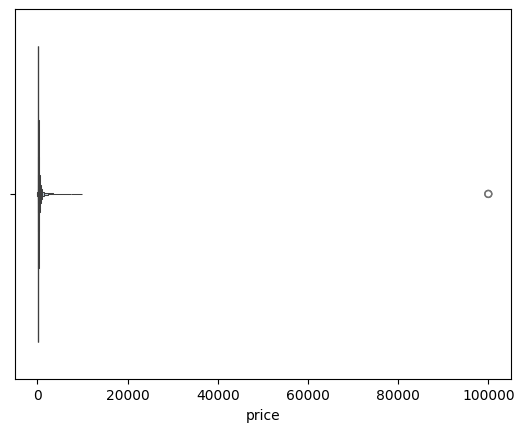

In [48]:
sns.boxenplot(data=df, x ='price')
plt.show()



*   List itemThe "price" data is highly skewed. The vast majority of prices are very low, concentrated near zero.


*  There is at least one extreme outlier. A single price point is significantly higher (around 100,000) than the rest of the prices in the dataset. This outlier could be an important data point or potentially an error in data entry, depending on the context of the data.List item






In [49]:
# Slicing data where price less then 400
df2 = df.loc[(df['price']<400) & (df['bedrooms'] != '7') & (df['bedrooms'] != '8') & (df['bedrooms'] != '9')]

In [50]:
df2.shape

(19479, 18)

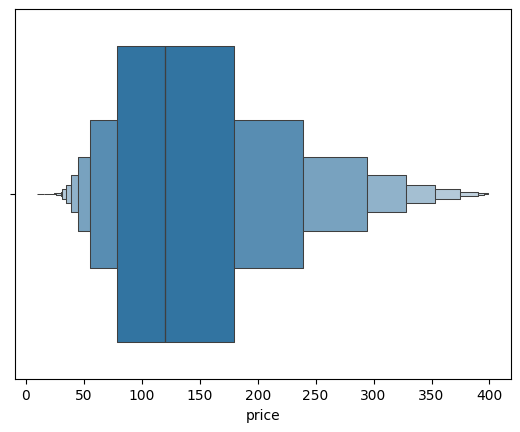

In [51]:
sns.boxenplot(data = df2,x='price')
plt.show()

/tmp/ipython-input-2763777014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2,y="price",x="neighbourhood_group",orient="v",ax=axes, palette='Set2')


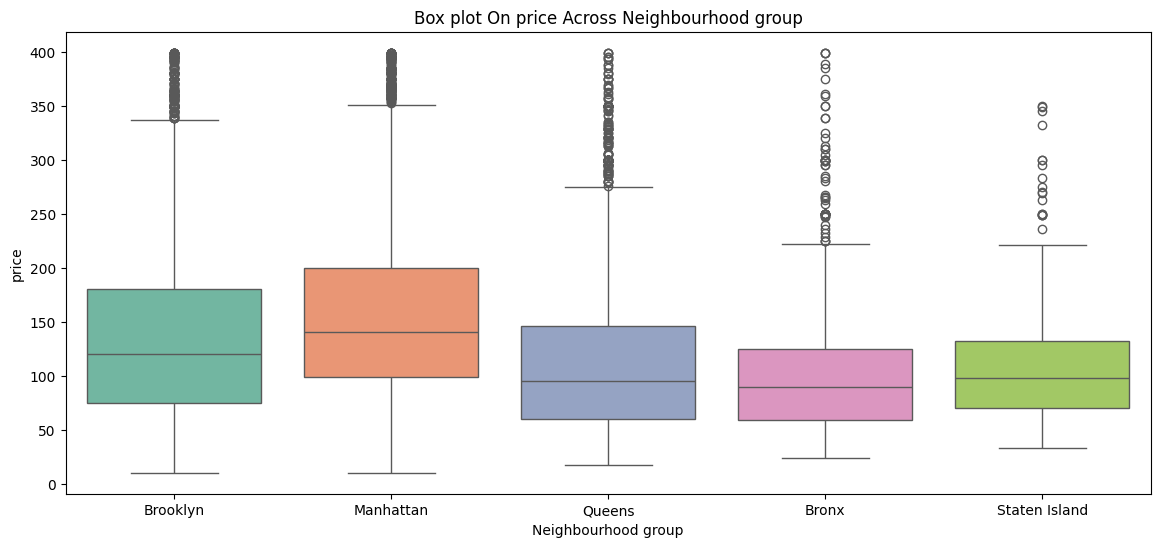

In [52]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(14, 6)
sns.boxplot(data=df2,y="price",x="neighbourhood_group",orient="v",ax=axes, palette='Set2')
axes.set(xlabel='Neighbourhood group', ylabel='price',title="Box plot On price Across Neighbourhood group")
plt.show()



*   Brooklyn: The median price is around 120. The interquartile range (IQR) is roughly from 75 to 180. There are many outliers extending up to about 400.
*   Manhattan: The median price is the highest among all boroughs, at approximately 140. The IQR is wide, from about 100 to 200. Similar to Brooklyn, there are numerous outliers.
*  Queens: The median price is the lowest, at around 95. The IQR is from about 60 to 145. This borough has the most significant number of outliers, with prices reaching almost 400.
*  Bronx: The median price is around 90, which is also quite low. The IQR is from about 60 to 130. There are a large number of outliers, with prices going up to nearly 400.
*  Staten Island: The median price is approximately 100. The IQR is from about 70 to 135. It has the fewest outliers, with prices extending up to about 350.



/tmp/ipython-input-3836567590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, y="price", x="room_type", orient="v", ax=axes, palette='Set2')


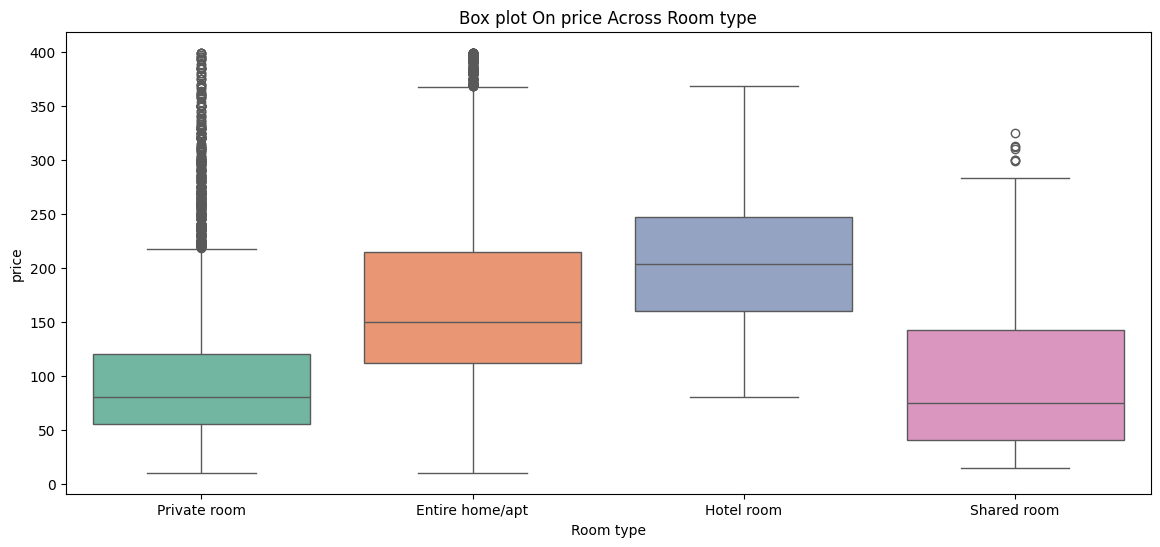

In [53]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(14, 6)
sns.boxplot(data=df2, y="price", x="room_type", orient="v", ax=axes, palette='Set2')
axes.set(xlabel='Room type', ylabel='price', title="Box plot On price Across Room type")
plt.show()

* Private room: The median price is the lowest, at around 80. The interquartile range (IQR) is roughly from 55 to 120. There are a large number of outliers, with prices extending up to about 400.
* Entire home/apt: The median price is around 150. The IQR is approximately from 115 to 220. There are some outliers, with prices going up to about 400.
* Hotel room: The median price is the highest, at around 200. The IQR is from about 165 to 250.
* Shared room: The median price is the second lowest, at around 75. The IQR is roughly from 40 to 140. There are a few outliers, with prices going up to about 325.

**Checking Correlation between the features**

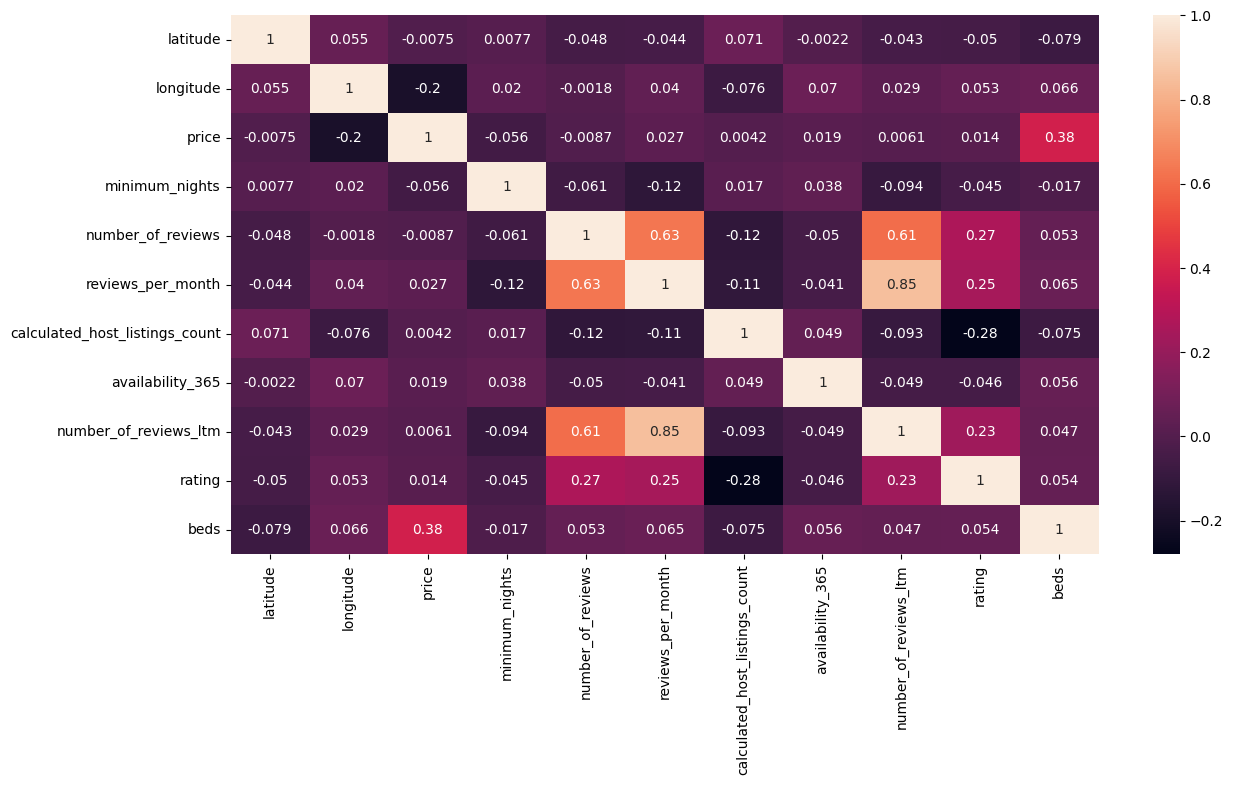

In [54]:
plt.figure(figsize=(14,	7))
sns.heatmap(df2.select_dtypes(include='number').corr(), annot=True)
plt.show()


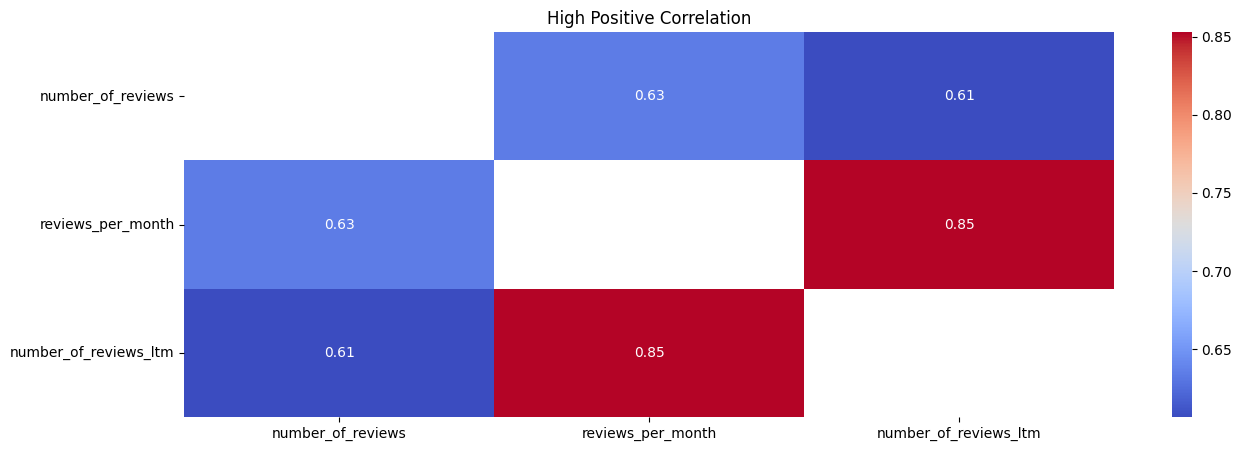

In [55]:
def get_high_corr(df, threshold):
    corr = df.select_dtypes('number').corr()
    high_corr = corr[(corr >= threshold) & (corr != 1.000)]
    high_corr = high_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)
    return high_corr

high_corr = get_high_corr(df2, 0.6)

plt.figure(figsize=(15, 5))
plot = sns.heatmap(high_corr, annot=True, cmap='coolwarm')
plot.set_title('High Positive Correlation')
plt.show()

* reviews_per_month and number_of_reviews_ltm are very strongly correlated (0.85), which is logical given their close nature.
* number_of_reviews has a moderately strong positive correlation with both reviews_per_month (0.63) and number_of_reviews_ltm (0.61). This suggests that older listings with many total reviews might not necessarily have the highest reviews_per_month or number_of_reviews_ltm if their activity has slowed, but generally, more total reviews still imply more recent review activity.

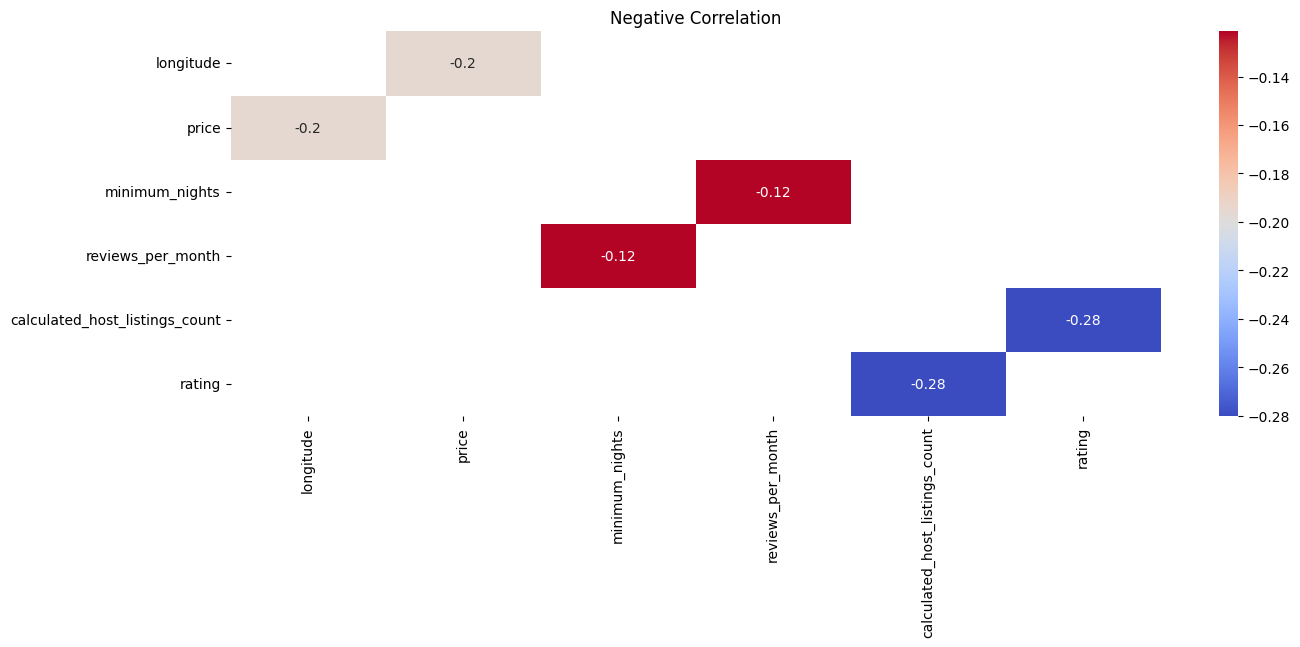

In [56]:
def get_high_corr(df, threshold):
    corr = df.select_dtypes('number').corr()
    high_corr = corr[(corr <= threshold) & (corr != 1.000)]
    high_corr = high_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)
    return high_corr

high_corr = get_high_corr(df2, -0.12)

plt.figure(figsize=(15, 5))
plot = sns.heatmap(high_corr, annot=True, cmap='coolwarm')
plot.set_title('Negative Correlation')
plt.show()

* **longitude vs. latitude (-0.2)**: This is the strongest negative correlation shown. It suggests that as longitude increases (moving east), latitude tends to decrease (moving south), or vice-versa. This kind of negative correlation can sometimes be observed in geographical datasets, depending on the specific area covered and its shape (e.g., if the data points are primarily distributed along a northwest-southeast axis).
* **price vs. latitude (-0.2)**: There's a moderately strong negative correlation between price and latitude. This implies that as latitude increases (moving north), price tends to decrease. Conversely, locations further south in the dataset (lower latitude) tend to have higher prices.
* **price vs. longitude (-0.047)**: This is a very weak negative correlation.
reviews_per_month vs. calculated_host_listings_count (-0.12): This indicates a weak negative correlation. It suggests that hosts with a higher number of listings (calculated_host_listings_count) might, on average, receive slightly fewer reviews per month per listing compared to hosts with fewer listings. This could be due to more spread-out attention or less individual focus on each listing.
* **number_of_reviews vs. calculated_host_listings_count (-0.12)**: Similar to reviews_per_month, there's a weak negative correlation here.
* **availability_365 vs. number_of_reviews (-0.105)**: A weak negative correlation. This suggests that listings with higher availability_365 (available more days) might tend to have slightly fewer number_of_reviews. This could happen if highly available listings are newer or less frequently booked, thus accumulating fewer reviews over time, or if they target a different market (e.g., long-term renters who leave fewer reviews).
* **availability_365 vs. number_of_reviews_ltm (-0.092)**: Similar to the previous point, a weak negative correlation.


**Feature** **Extraction**

In [57]:
df2['last_review']

,last_review
0,20/12/15
1,1/5/2023
2,18/12/23
3,17/09/23
4,3/12/2023
...,...
20765,29/09/23
20766,1/7/2023
20767,8/12/2023
20768,17/09/23


In [58]:
def Year(i):
    i = str(i)
    if len(i.split('/')[2]) <= 2:
        return '20' + i.split('/')[2]
    else:
        return i.split('/')[2]

df2['year_last_review'] = df['last_review'].apply(lambda x: Year(x))

/tmp/ipython-input-3366193546.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year_last_review'] = df['last_review'].apply(lambda x: Year(x))


In [59]:
df2['year_last_review'].head(5)

,year_last_review
0,2015
1,2023
2,2023
3,2023
4,2023


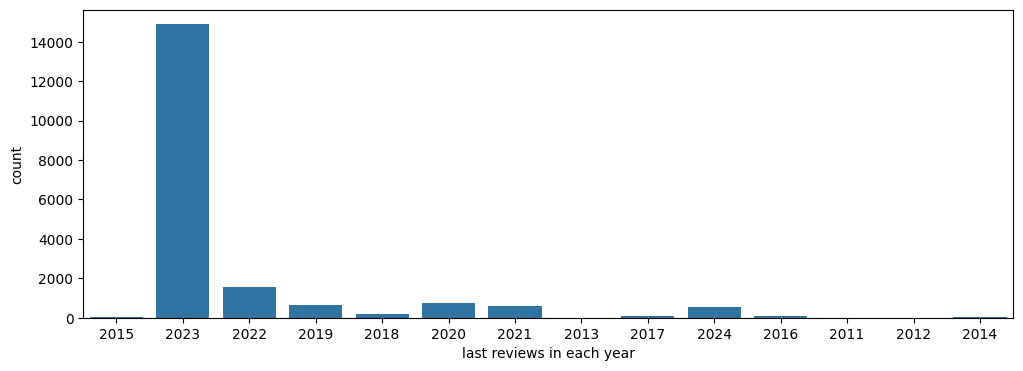

In [60]:
plt.figure(figsize=(12,4))
sns.countplot(data = df2, x = 'year_last_review')
plt.xlabel('last reviews in each year')
plt.show()

In [61]:
df2['month_last_review'] = df['last_review'].apply(lambda x: x.split('/')[1])

/tmp/ipython-input-3802748257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month_last_review'] = df['last_review'].apply(lambda x: x.split('/')[1])


In [62]:
df2['month_last_review'].value_counts()

,count
month_last_review,
12,4214
11,3139
10,2655
9,1398
09,1301
08,1283
1,1076
07,628
8,559


In [63]:
def nameMonth(name):
    if name == '1' or name == '01':
       return 'January'
    if name == '2' or name == '02':
        return 'February'
    if name == '3' or name == '03':
        return 'March'
    if name == '4' or name == '04':
         return 'April'
    if name == '5' or name == '05':
        return 'May'
    if name == '6' or name == '06':
        return 'June'
    if name == '7' or name == '07':
        return 'July'
    if name == '8' or name == '08':
        return 'August'
    if name == '9' or name == '09':
        return 'September'
    if name == '10':
        return 'October'
    if name == '11':
        return 'November'
    if name == '12':
        return 'December'

df2['month_last_review'] = df2['month_last_review'].apply(lambda x : nameMonth(x))

/tmp/ipython-input-1435252779.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month_last_review'] = df2['month_last_review'].apply(lambda x : nameMonth(x))


In [64]:
df2['month_last_review'].value_counts()

,count
month_last_review,
December,4214
November,3139
September,2699
October,2655
August,1842
January,1324
July,954
June,788
May,708


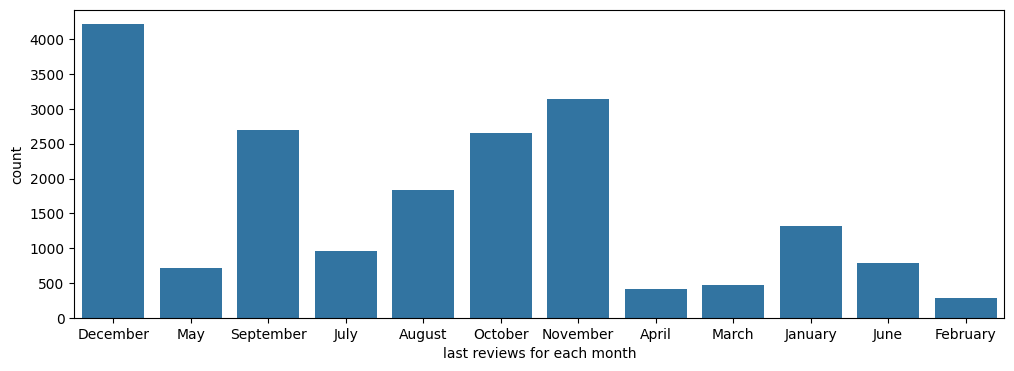

In [65]:
plt.figure(figsize=(12,4))
sns.countplot(data = df2, x = 'month_last_review')
plt.xlabel('last reviews for each month')
plt.show()

In [66]:
df2['price per bed'] = df2['price']/df2['beds']

/tmp/ipython-input-2956907580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price per bed'] = df2['price']/df2['beds']


In [67]:
df2['price per bed'].head(5)

,price per bed
0,55.0
1,144.0
2,93.5
3,120.0
4,85.0


**Analysis**

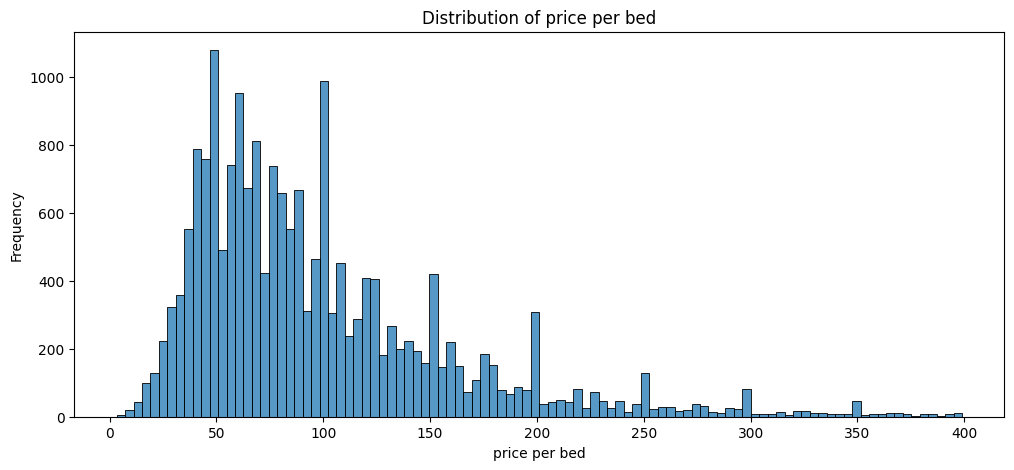

In [68]:
plt.figure(figsize=(12,5))
sns.histplot(data=df2, x='price per bed',bins=100)
plt.xlabel('price per bed')
plt.ylabel('Frequency')
plt.title('Distribution of price per bed')
plt.show()

* **Highly Right-Skewed Distribution: **The most striking feature is the very tall bar at the beginning of the x-axis, close to 0, and then a rapid decline in frequency as "price per bed" increases. This indicates that:
*     The vast majority of listings have a very low price per bed. The highest frequency is for prices per bed in the lower ranges (e.g., between 0 and 100-150).
*     Fewer listings have higher prices per bed. The frequencies drop significantly as you move to the right, with very few listings having a price per bed above, say, 400 or 500.
* **Peak Frequency**: The highest frequency, close to 2500, occurs for listings with a "price per bed" around 50-75.
* **Long Tail**: The distribution has a long tail extending to the right, indicating that while rare, there are some listings with very high "price per bed" values, even up to 1200. These could be luxury accommodations or properties with unique characteristics that command a premium.

/tmp/ipython-input-1224017797.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df2, x = df2['neighbourhood_group'], palette=['green','blue','yellow','orange','red'])


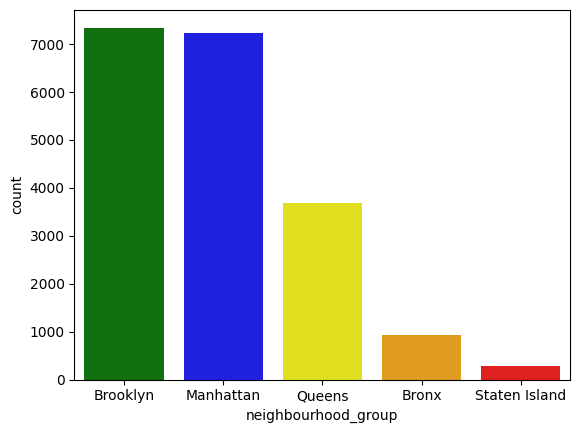

In [69]:
sns.countplot(data = df2, x = df2['neighbourhood_group'], palette=['green','blue','yellow','orange','red'])
plt.xlabel('neighbourhood_group')
plt.show()

**The chart shows that the vast majority of listings are concentrated in Brooklyn and Manhattan. Queens has a moderate number of listings, while the Bronx and Staten Island have a small number of listings in comparison.**


In [70]:
df2.groupby(by ='neighbourhood_group')['price'].mean()

,price
neighbourhood_group,
Bronx,103.736954
Brooklyn,135.799319
Manhattan,158.105853
Queens,113.387018
Staten Island,110.576923


/tmp/ipython-input-3112949095.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neighbourhood_group', y='price', data=price, palette='viridis')


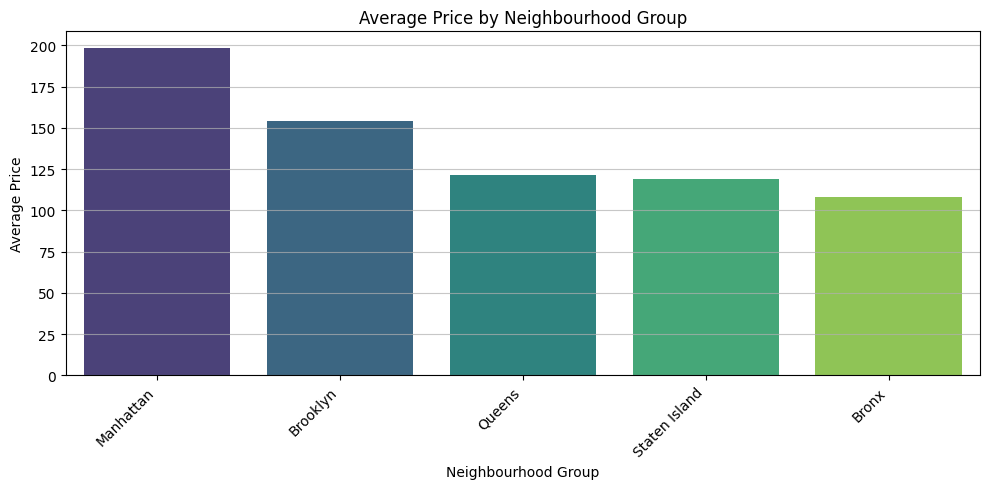

In [72]:
data = {
    'neighbourhood_group': ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
    'price': [107.9905, 154.3475, 198.5880, 121.3946, 118.7800]
}
price = pd.DataFrame(data)

price = price.sort_values(by='price', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='neighbourhood_group', y='price', data=price, palette='viridis')
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

**The chart clearly shows that the average price for listings is highest in Manhattan, followed by Brooklyn. The average prices in Queens, Staten Island, and the Bronx are all much lower and are relatively close to each other, with the Bronx having the lowest average price.**

In [73]:
# Average price for bed
df2.groupby(by='neighbourhood_group')['price per bed'].mean()

,price per bed
neighbourhood_group,
Bronx,72.950096
Brooklyn,93.355075
Manhattan,119.229350
Queens,74.581198
Staten Island,67.112188


/tmp/ipython-input-1824714505.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neighbourhood_group', y='price per bed', data=df_avg_price, palette='Set2')


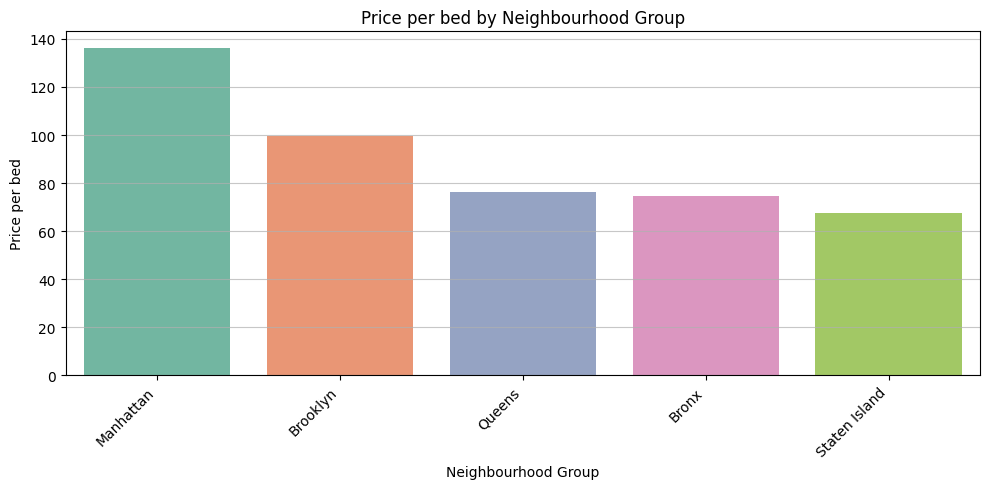

In [74]:
data = {
    'neighbourhood_group': ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
    'price per bed': [74.71, 99.58, 136.34, 76.25, 67.72]
}
df_avg_price = pd.DataFrame(data)

df_avg_price = df_avg_price.sort_values(by='price per bed', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='neighbourhood_group', y='price per bed', data=df_avg_price, palette='Set2')
plt.title('Price per bed by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price per bed')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

**The chart shows that the price per bed is highest in Manhattan, followed by Brooklyn. Queens, the Bronx, and Staten Island have significantly lower price-per-bed values, with Staten Island having the lowest. The price per bed in Manhattan is substantially higher than in any other neighbourhood group.**

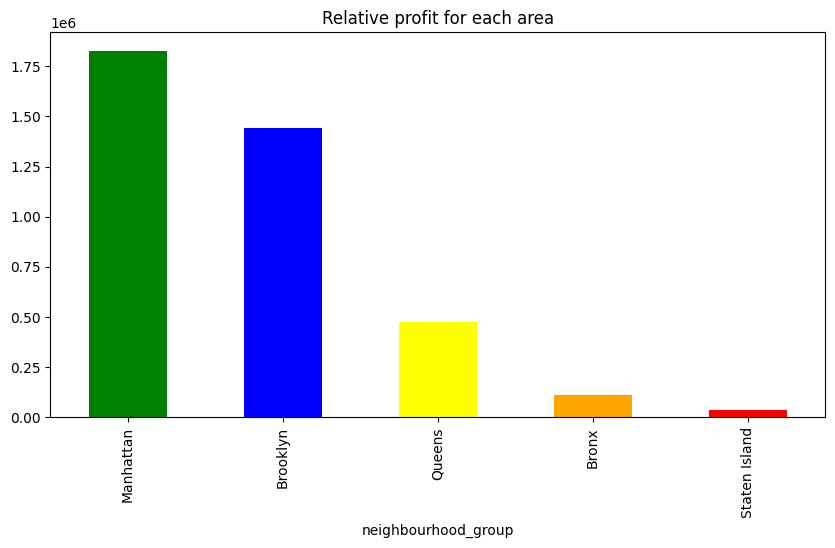

In [75]:
plt.figure(figsize=(10, 5))

grouped = df.groupby('neighbourhood_group')['price'].agg(['mean', 'count'])
grouped['relative_profit'] = grouped['mean'] * grouped['count']
grouped.sort_values(by='relative_profit', ascending=False)['relative_profit'].plot(kind='bar', color=['green','blue','yellow','orange','red'])
plt.title('Relative profit for each area')
plt.show()

**BI Variable Analysis**

One variable depenency in another variable

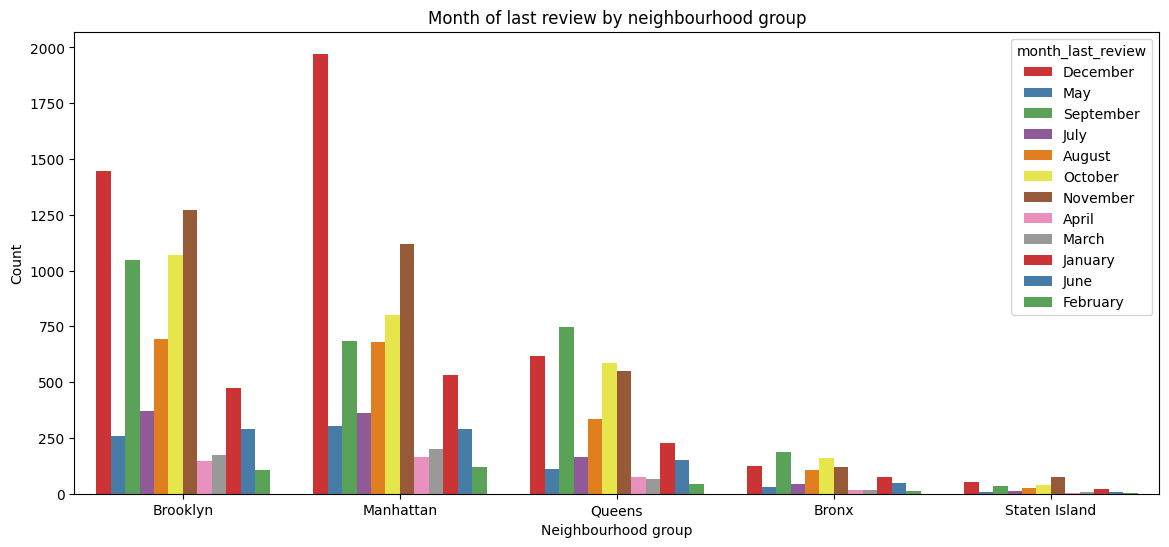

In [76]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df2, x='neighbourhood_group' ,hue='month_last_review', palette='Set1')
plt.title('Month of last review by neighbourhood group')
plt.xlabel('Neighbourhood group')
plt.ylabel('Count')
plt.show()

**The most recent reviews are heavily concentrated in the last few months of the year, particularly December, November, October, and September. This is a common pattern for many businesses.**
* **Manhattan**: This borough has the highest overall number of reviews. "December" is the most frequent month for the last review, with nearly 2000 listings. "November" and "October" also have high counts.
* **Brooklyn**: This borough also has a very high number of reviews. Similar to Manhattan, "December" has the highest count, followed by "November" and "October."
* **Queens**: The overall number of reviews is lower than in Brooklyn and Manhattan. "December" is the most frequent month for the last review, followed by "October" and "November."
* **Bronx**: The number of reviews is significantly lower than the other three boroughs. "October," "November," and "December" are the most frequent months for the last review.
* **Staten Island**: This borough has the lowest number of reviews. "November," "December," and "October" have the highest counts, but they are all very low in comparison to the other boroughs.

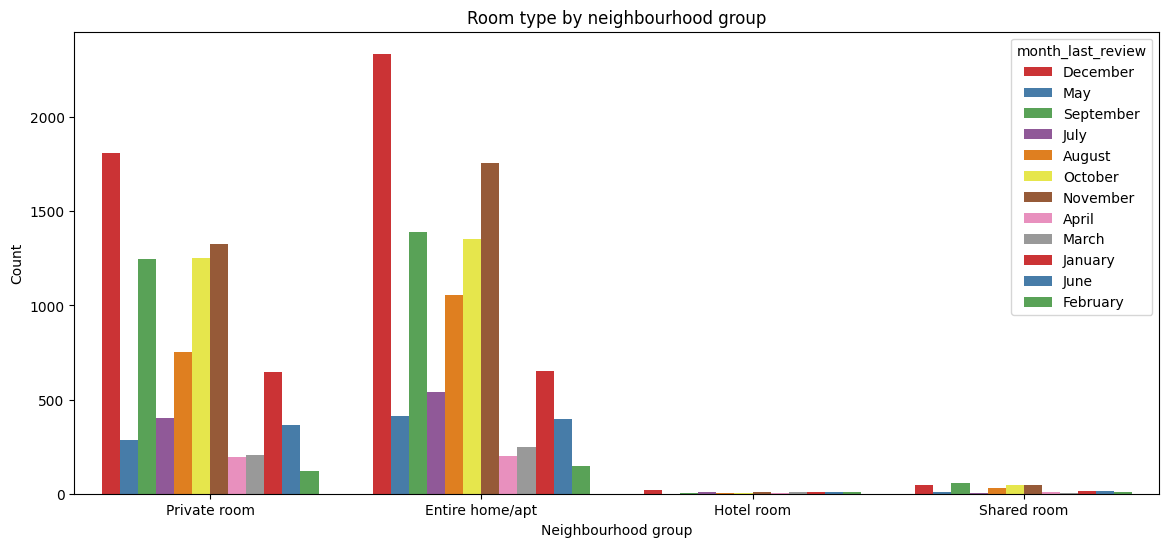

In [77]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df2, x='room_type' ,hue='month_last_review', palette='Set1')
plt.title('Room type by neighbourhood group')
plt.xlabel('Neighbourhood group')
plt.ylabel('Count')
plt.show()


The chart shows a high number of reviews for "Private room" and "Entire home/apt," with significantly fewer reviews for "Hotel room" and "Shared room." The reviews are most frequent in the latter months of the year (December, November, and October).
* **Private room**: This room type has a high number of reviews, with "December," "September," "November," and "October" having the highest counts, all above 1000.
* **Entire home/apt**: This room type has the highest number of reviews overall, with "December" and "November" having the highest counts. "September" and "October" also show high review counts.
* **Hotel room**: The number of reviews for this room type is extremely low, with counts barely exceeding 50 for any given month.
Shared room: The number of reviews for this room type is also very low, although slightly higher than "Hotel room." "December" has the highest count, followed by "November" and "October."
